### PYTHON ELECTRICITY CONSUMPTION FORECASTING CASE STUDY - shubhamjainxyz@gmail.com

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

In [2]:
path = 'C:/Users/shubh/Desktop/ALABS PYTHON CASE STUDIES/case studies/electricity consumption/'

### IMPORTING DATASETS

In [3]:
electricity_consumption = pd.read_csv(path + 'Electricity Consumption.csv')

In [4]:
electricity_consumption.head()

,DATE,Electricty_Consumption_in_TW
0,01-01-1973,35.9728
1,01-02-1973,36.1334
2,01-03-1973,35.0625
3,01-04-1973,33.8416
4,01-05-1973,33.5107


In [5]:
electricity_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [6]:
# CORRECTING THE DATA TYPE FOR DATE COLUMN
electricity_consumption['DATE'] = pd.to_datetime(electricity_consumption['DATE'], format = '%d-%m-%Y')

In [7]:
electricity_consumption['Month'] = pd.DatetimeIndex(electricity_consumption['DATE']).month
electricity_consumption['Year'] = pd.DatetimeIndex(electricity_consumption['DATE']).year

In [8]:
electricity_consumption.head()

,DATE,Electricty_Consumption_in_TW,Month,Year
0,1973-01-01,35.9728,1,1973
1,1973-02-01,36.1334,2,1973
2,1973-03-01,35.0625,3,1973
3,1973-04-01,33.8416,4,1973
4,1973-05-01,33.5107,5,1973


In [9]:
electricity_consumption['Year'].value_counts().sort_index()

1973    12
1974    12
1975    12
1976    12
1977    12
1978    12
1979    12
1980    12
1981    12
1982    12
1983    12
1984    12
1985    12
1986    12
1987    12
1988    12
1989    12
1990    12
1991    12
1992    12
1993    12
1994    12
1995    12
1996    12
1997    12
1998    12
1999    12
2000    12
2001    12
2002    12
2003    12
2004    12
2005    12
2006    12
2007    12
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019     9
Name: Year, dtype: int64

In [10]:
electricity_consumption.set_index(electricity_consumption['DATE'], inplace = True)

In [11]:
electricity_consumption.head()

,DATE,Electricty_Consumption_in_TW,Month,Year
DATE,,,,
1973-01-01,1973-01-01,35.9728,1,1973
1973-02-01,1973-02-01,36.1334,2,1973
1973-03-01,1973-03-01,35.0625,3,1973
1973-04-01,1973-04-01,33.8416,4,1973
1973-05-01,1973-05-01,33.5107,5,1973


In [12]:
# WE WILL USE elec_comp_ts FOR OUR FURTHER ANALYSIS AND MODELLING PURPOSES
elec_comp_ts = electricity_consumption['Electricty_Consumption_in_TW']
elec_comp_ts.head()

DATE
1973-01-01    35.9728
1973-02-01    36.1334
1973-03-01    35.0625
1973-04-01    33.8416
1973-05-01    33.5107
Name: Electricty_Consumption_in_TW, dtype: float64

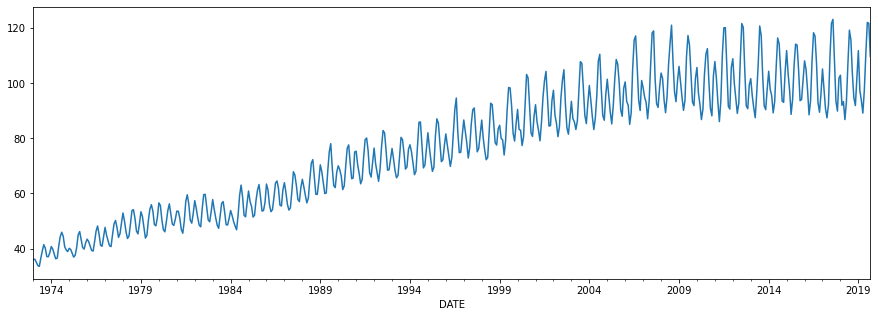

In [13]:
elec_comp_ts.plot(figsize = (15, 5))
plt.show()

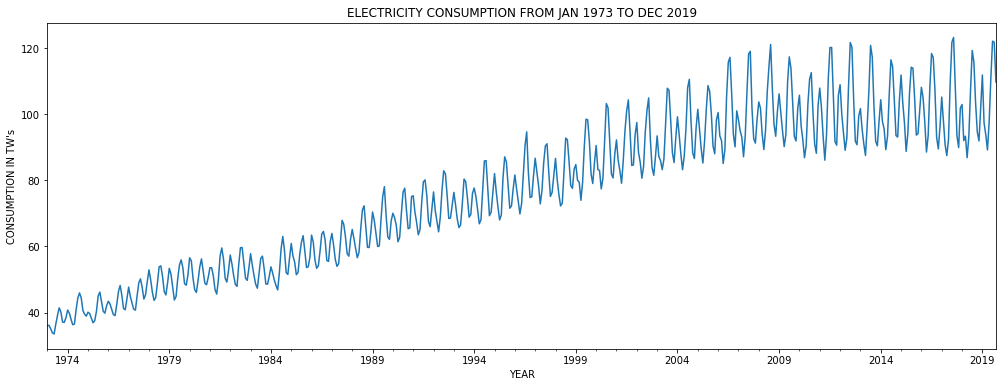

In [14]:
elec_comp_ts.plot(kind = 'line', figsize = (17, 6))
plt.title('ELECTRICITY CONSUMPTION FROM JAN 1973 TO DEC 2019')
plt.xlabel('YEAR')
plt.ylabel('CONSUMPTION IN TW\'s')
plt.show()
# FROM THE GRAPH IT IS VISIBLE THAT THE ELECTRICITY CONSUMPTION HAS BOTH TREND AND SEASONALITY, HOWEVER CYCLICITY IS NOT THERE.
# THE CONSUMPTION HAS VARYING TREND - IT INCREASES FROM 1973 TILL 1983, DIPS IN IN 1984 THEN AGAIN INCREASES FROM 1985 TILL 2009
# AFTERWARDS IT BECOMES LINEAR.

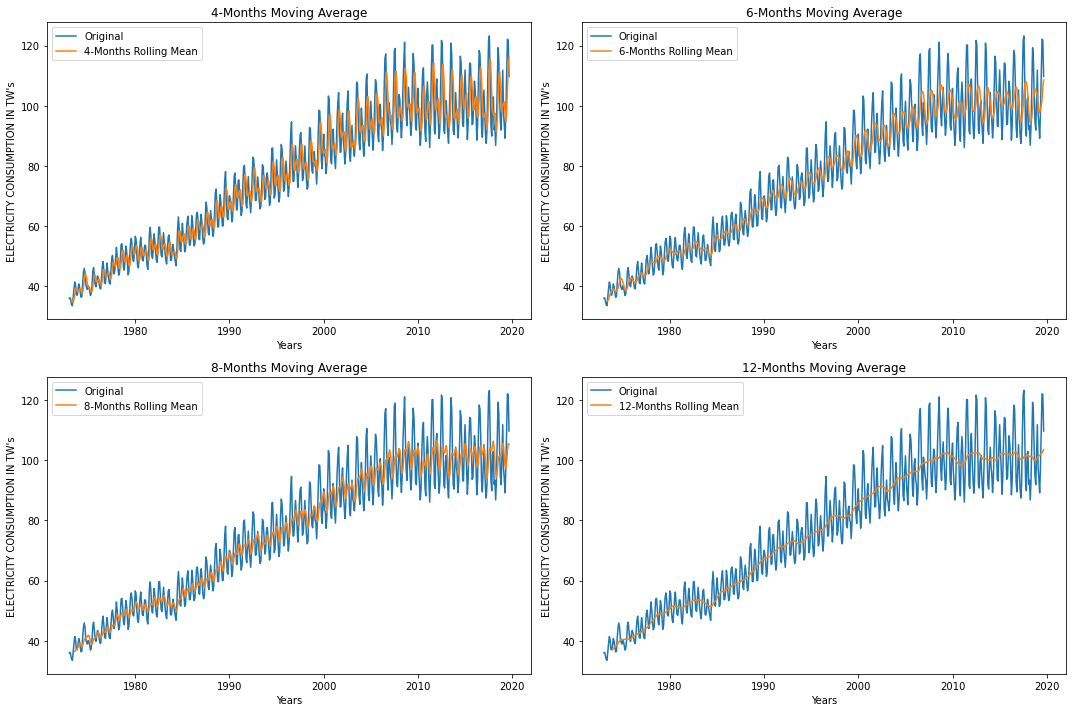

In [15]:
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(15)
fig.set_figheight(10)

axes[0][0].plot(elec_comp_ts.index, elec_comp_ts, label = 'Original')
axes[0][0].plot(elec_comp_ts.index, elec_comp_ts.rolling(window = 4).mean(), label = '4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("ELECTRICITY CONSUMPTION IN TW's")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc = 'best')

axes[0][1].plot(elec_comp_ts.index, elec_comp_ts, label = 'Original')
axes[0][1].plot(elec_comp_ts.index, elec_comp_ts.rolling(window = 6).mean(), label = '6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("ELECTRICITY CONSUMPTION IN TW's")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc = 'best')

axes[1][0].plot(elec_comp_ts.index, elec_comp_ts, label = 'Original')
axes[1][0].plot(elec_comp_ts.index, elec_comp_ts.rolling(window = 8).mean(), label = '8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("ELECTRICITY CONSUMPTION IN TW's")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc = 'best')

axes[1][1].plot(elec_comp_ts.index, elec_comp_ts, label = 'Original')
axes[1][1].plot(elec_comp_ts.index, elec_comp_ts.rolling(window = 12).mean(), label ='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("ELECTRICITY CONSUMPTION IN TW's")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc = 'best')

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Year'>

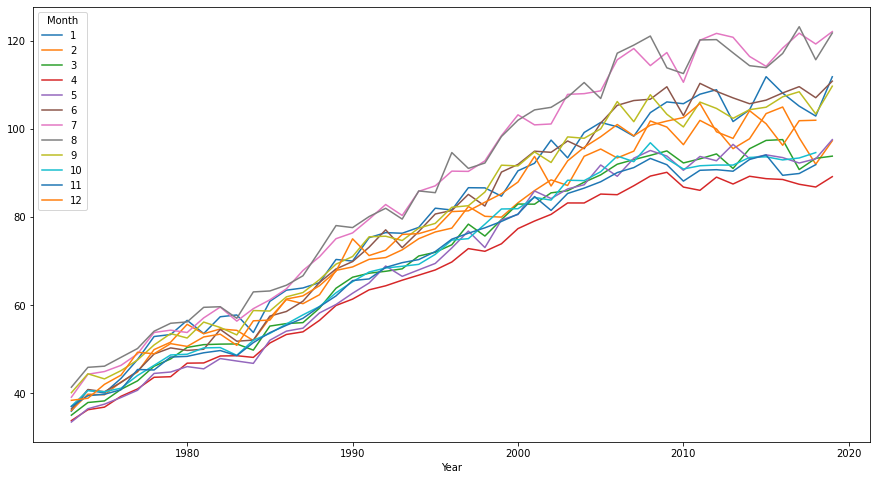

In [16]:
pd.pivot_table(electricity_consumption, index = 'Year', columns = 'Month', values = 'Electricty_Consumption_in_TW').plot(figsize = (15, 8))

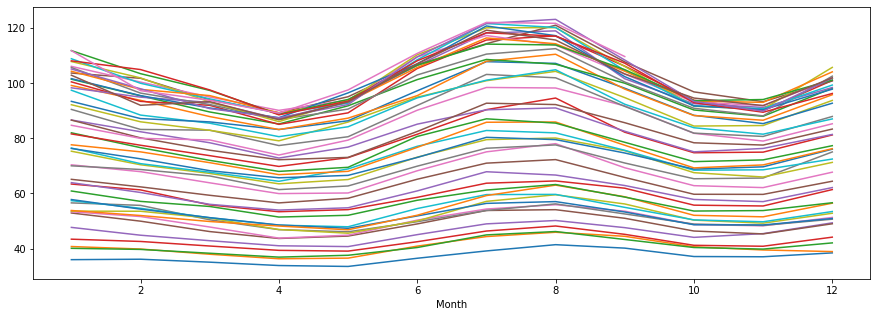

In [17]:
pd.pivot_table(electricity_consumption, index = 'Month', columns = 'Year', values = 'Electricty_Consumption_in_TW').plot(figsize = (15, 5), legend  = False)
plt.show()

### DECOMPOSING OUR ELECTRICITY CONSUMPTION TIME SERIES

In [18]:
decomposition = smt.seasonal_decompose(elec_comp_ts, model = 'multiplicative', extrapolate_trend = 12)

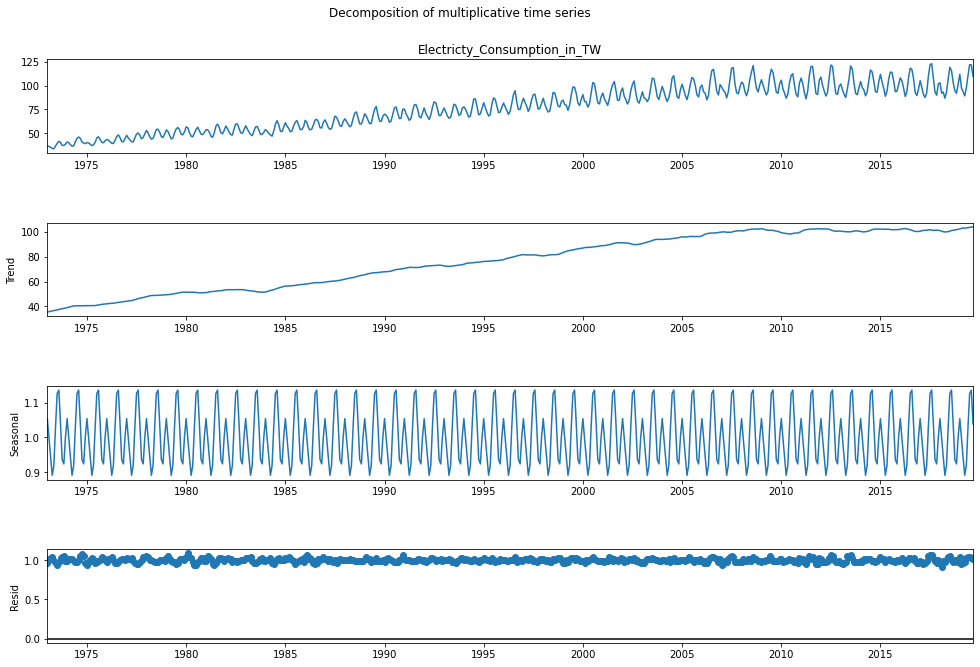

In [19]:
fig = decomposition.plot()
fig.set_figwidth(15)
fig.set_figheight(10)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [20]:
pd.concat([decomposition.trend, decomposition.seasonal, decomposition.resid], axis = 1).tail(50)

,trend,seasonal,resid
DATE,,,
2015-08-01,101.775792,1.136594,0.984830
2015-09-01,101.845562,1.038842,0.991909
2015-10-01,101.845517,0.936468,0.982324
2015-11-01,101.812025,0.923797,1.000608
2015-12-01,101.854179,1.001108,0.992375
2016-01-01,102.094354,1.054225,1.004842
2016-02-01,102.400512,0.996145,1.029256
2016-03-01,102.632750,0.945680,1.005555
2016-04-01,102.701575,0.890985,0.967675


### USING FBPROPHET PACKAGE

In [21]:
from fbprophet import Prophet

In [22]:
elec_comp_ts1 = elec_comp_ts.reset_index()
elec_comp_ts1.columns = ['ds', 'y']
elec_comp_ts1

,ds,y
0,1973-01-01,35.9728
1,1973-02-01,36.1334
2,1973-03-01,35.0625
3,1973-04-01,33.8416
4,1973-05-01,33.5107
...,...,...
556,2019-05-01,97.5860
557,2019-06-01,110.8580
558,2019-07-01,122.1014
559,2019-08-01,121.7765


### APPLYING FBPROPHET MODEL 

In [23]:
elec_comp_model = Prophet(seasonality_mode = 'multiplicative', interval_width = 0.99)
elec_comp_model = elec_comp_model.fit(elec_comp_ts1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### FORECASTING ELECTRICITY CONSUMPTION FOR NEXT 2 YEARS USING FBPROPHET MODEL

In [61]:
elec_comp_forecast1 = elec_comp_model.make_future_dataframe(periods = 24, freq = 'MS', include_history = True)
elec_comp_forecast1 = elec_comp_model.predict(elec_comp_forecast1)
elec_comp_forecast1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1973-01-01,36.607565,32.796603,44.487301,36.607565,36.607565,0.047555,0.047555,0.047555,0.047555,0.047555,0.047555,0.0,0.0,0.0,38.348455
1,1973-02-01,36.781089,29.807597,41.955738,36.781089,36.781089,-0.019417,-0.019417,-0.019417,-0.019417,-0.019417,-0.019417,0.0,0.0,0.0,36.066895
2,1973-03-01,36.937820,29.319621,40.701169,36.937820,36.937820,-0.061385,-0.061385,-0.061385,-0.061385,-0.061385,-0.061385,0.0,0.0,0.0,34.670384
3,1973-04-01,37.111344,27.316613,38.524062,37.111344,37.111344,-0.116729,-0.116729,-0.116729,-0.116729,-0.116729,-0.116729,0.0,0.0,0.0,32.779379
4,1973-05-01,37.279270,28.216358,40.039307,37.279270,37.279270,-0.077907,-0.077907,-0.077907,-0.077907,-0.077907,-0.077907,0.0,0.0,0.0,34.374941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,2021-05-01,102.694577,88.309139,100.395351,101.731757,103.644865,-0.077907,-0.077907,-0.077907,-0.077907,-0.077907,-0.077907,0.0,0.0,0.0,94.693913
581,2021-06-01,102.706246,100.860719,112.340818,101.677411,103.724492,0.040680,0.040680,0.040680,0.040680,0.040680,0.040680,0.0,0.0,0.0,106.884366
582,2021-07-01,102.717540,111.246183,122.772610,101.628738,103.801551,0.140007,0.140007,0.140007,0.140007,0.140007,0.140007,0.0,0.0,0.0,117.098741
583,2021-08-01,102.729210,112.038028,123.267674,101.578443,103.881178,0.147157,0.147157,0.147157,0.147157,0.147157,0.147157,0.0,0.0,0.0,117.846547


In [59]:
elec_comp_model.make_future_dataframe?

In [62]:
elec_comp_forecast1.tail(25).to_csv(path + 'elec_comp_forecast1.csv')

### CALCULATING ERROR METRICS

In [25]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

### MEAN ABSOLUTE ERROR

In [26]:
mean_absolute_error(elec_comp_ts, elec_comp_forecast1.loc[ : 560, 'yhat'])

1.7282701201421302

### MEAN SQUARED ERROR

In [27]:
mean_squared_error(elec_comp_ts, elec_comp_forecast1.loc[ : 560, 'yhat'])

4.896025275434932

### ROOT MEAN SQUARED ERROR

In [28]:
np.sqrt(mean_squared_error(elec_comp_ts, elec_comp_forecast1.loc[ : 560, 'yhat']))

2.2126963812134126

### MEAN ABSOLUTE PERCENTAGE ERROR

In [29]:
np.mean(np.abs((elec_comp_forecast1.loc[ : 560, 'yhat'] - elec_comp_ts.values)*100/elec_comp_ts.values))

2.390492384064102

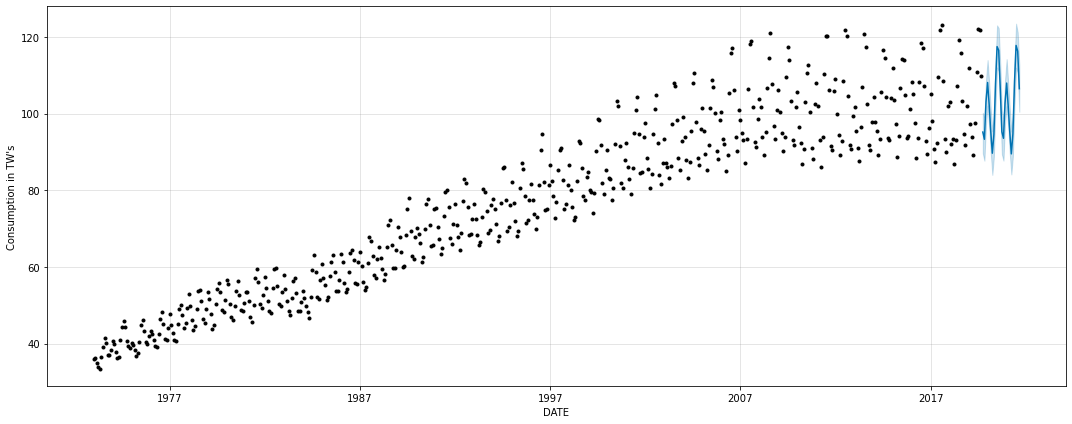

In [30]:
elec_comp_model.plot(elec_comp_forecast1.tail(24), xlabel = 'DATE', ylabel = 'Consumption in TW\'s', figsize = (15, 6))
plt.show()

In [31]:
elec_comp_forecast1.loc[ 562 : , 'yhat']

562     93.298671
563    103.035941
564    108.103486
565    102.211196
566     95.470542
567     89.663287
568     94.572382
569    107.788112
570    117.465821
571    116.527449
572    106.323778
573     95.255218
574     93.555800
575    102.783327
576    107.961538
577    101.671880
578     95.331117
579     89.495789
580     94.728031
581    108.285550
582    117.768617
583    116.279800
584    106.493418
Name: yhat, dtype: float64

### USING ETS MODEL

#### APPLYING DICKEY-FULLER TEST TO VERIFY WHETHER DATA IS STATIONARY OR NON-STATIONARY

In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
# Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(elec_comp_ts)

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#lags Used', 
                                           'Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)
# HIGH P-VALUE OF TEST INDICATES OUR DATA IS NON-STATIONARY

Results of Dickey-Fuller Test:
Test Statistic                  -1.740593
p-value                          0.410328
#lags Used                      15.000000
Number of Observations Used    545.000000
Critical Value (1%)             -3.442406
Critical Value (5%)             -2.866858
Critical Value (10%)            -2.569602
dtype: float64


In [34]:
# Performing Dickey-Fuller test on log transformed time series:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(np.log(elec_comp_ts))

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#lags Used', 
                                           'Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)
# LOW P-VALUE OF TEST INDICATES THAT LOG TRANSFORMED TIME SERIES IS STATIONARY, HENCE WE WILL USE LOG TRANSFORMED 
# TIME SERIES FOR MODELLING USING ETS AND ARIMA.

Results of Dickey-Fuller Test:
Test Statistic                  -3.001867
p-value                          0.034720
#lags Used                      15.000000
Number of Observations Used    545.000000
Critical Value (1%)             -3.442406
Critical Value (5%)             -2.866858
Critical Value (10%)            -2.569602
dtype: float64


In [35]:
# LOG TRANSFORMING ORIGINAL TIME SERIES.
elec_comp_ts_log = np.log(elec_comp_ts)
elec_comp_ts_log.head()

DATE
1973-01-01    3.582763
1973-02-01    3.587218
1973-03-01    3.557132
1973-04-01    3.521691
1973-05-01    3.511865
Name: Electricty_Consumption_in_TW, dtype: float64

<AxesSubplot:xlabel='DATE'>

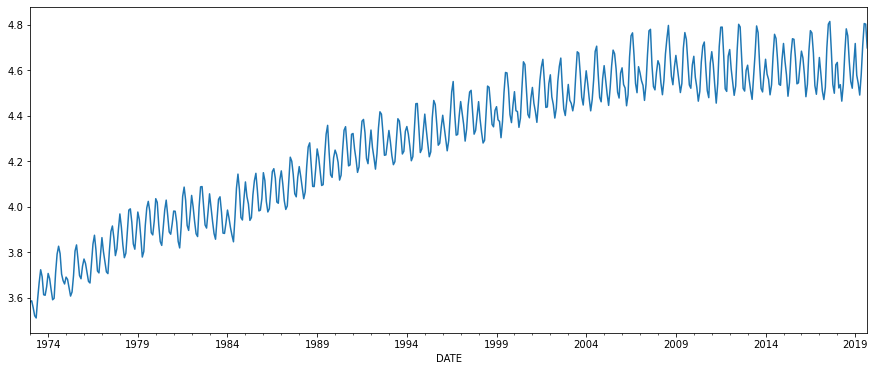

In [36]:
elec_comp_ts_log.plot(figsize = (15, 6))

### APPLYTING ETS MODEL ON OUR LOG TRANSFORMED TIME SERIES

In [37]:
from statsmodels.tsa.api import ExponentialSmoothing, ETSModel

In [38]:
ets_model = ExponentialSmoothing(elec_comp_ts_log, trend = 'multiplicative', seasonal = 'multiplicative', seasonal_periods = 12, freq = 'MS').fit()

C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [39]:
ets_model.fittedvalues

DATE
1973-01-01    3.591744
1973-02-01    3.557335
1973-03-01    3.522902
1973-04-01    3.492256
1973-05-01    3.503054
                ...   
2019-05-01    4.555071
2019-06-01    4.717302
2019-07-01    4.805966
2019-08-01    4.791175
2019-09-01    4.686492
Length: 561, dtype: float64

## CALCULATING ERROR METRICS

### MEAN ABSOLUTE ERROR

In [40]:
mean_absolute_error(elec_comp_ts_log, ets_model.fittedvalues), mean_absolute_error(elec_comp_ts, np.exp(ets_model.fittedvalues))

(0.01768661663130825, 1.3718904870588164)

### MEAN SQUARED ERROR

In [41]:
mean_squared_error(elec_comp_ts_log, ets_model.fittedvalues), mean_squared_error(elec_comp_ts, np.exp(ets_model.fittedvalues))

(0.0005059577295926705, 3.405990148236903)

### ROOT MEAN SQUARED ERROR

In [42]:
np.sqrt(mean_squared_error(elec_comp_ts_log, ets_model.fittedvalues)), np.sqrt(mean_squared_error(elec_comp_ts, np.exp(ets_model.fittedvalues)))

(0.02249350416437311, 1.84553248365801)

### MEAN ABSOLUTE PERCENTAGE ERROR

In [43]:
np.mean(np.abs((elec_comp_ts_log - ets_model.fittedvalues)*100/elec_comp_ts_log)), np.mean(np.abs((elec_comp_ts - np.exp(ets_model.fittedvalues))*100/elec_comp_ts))

(0.4136687002996417, 1.7689899286908304)

### FORECASTING ELECTRICITY CONSUMPTION FOR NEXT 2 YEARS USING ETS MODEL

In [64]:
np.exp(ets_model.forecast(24)).to_csv(path + 'ets_forecast.csv')

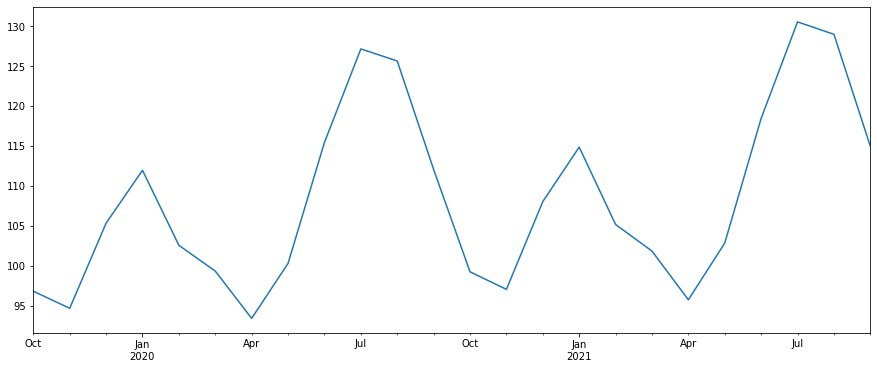

In [44]:
np.exp(ets_model.forecast(24)).plot(figsize = (15, 6))
plt.show()

### USING ARIMA MODEL

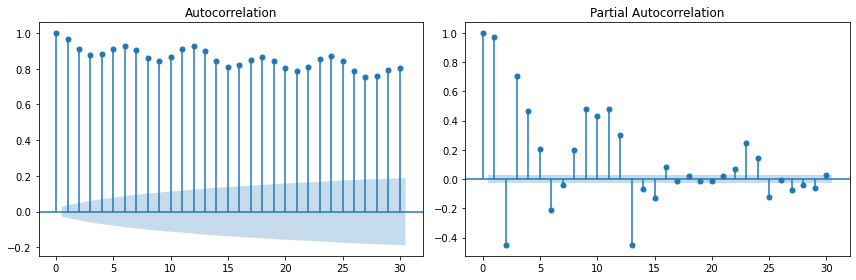

In [45]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(elec_comp_ts_log, lags = 30, ax = axes[0], alpha = 0.5)
smt.graphics.plot_pacf(elec_comp_ts_log, lags = 30, ax = axes[1], alpha = 0.5, method = 'ols')
plt.tight_layout()

In [46]:
import itertools
import warnings
warnings.filterwarnings("ignore")

### CREATING GRID SEARCH TO FIND OPTIMAL PARAMETERS FOR ARIMA MODEL

In [47]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [48]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = smt.SARIMAX(elec_comp_ts_log,
                                     order = param,
                                     seasonal_order = param_seasonal,
                                     enforce_stationarity=False,
                                     enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 1)x(1, 0, 1, 12)12 model - AIC:-2666.7480458891923


### APPLYING ARIMA MODEL TO OUR TIME SERIES WITH OPTIMAL PARAMETERS

In [49]:
arima_model = smt.SARIMAX(elec_comp_ts_log,
                          order = (1, 1, 1),
                          seasonal_order = (1, 0, 1, 12),
                          enforce_stationarity=False,
                          enforce_invertibility=False).fit()

In [50]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:       Electricty_Consumption_in_TW   No. Observations:                  561
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                1338.374
Date:                            Sat, 19 Jun 2021   AIC                          -2666.748
Time:                                    20:04:50   BIC                          -2645.235
Sample:                                01-01-1973   HQIC                         -2658.338
                                     - 09-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6128      0.054     11.335      0.000       0.507       0.719
ma.L1         -0.8905      0.034    -26.054      0.000      -0.958      -0.824
ar.S.L12       1.0076      0.003    367.045      0.000       1.002       1.013
ma.S.L12      -0.8210      0.028    -29.009      0.000      -0.876      -0.765
sigma2         0.0004   2.55e-05     16.615      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   1.17   Jarque-Bera (JB):                 1.27
Prob(Q):                              0.28   Prob(JB):                         0.53
Heteroskedasticity (H):               1.29   Skew:                             0.10
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## CALCULATING ERROR METRICS

### MEAN ABSOLUTE ERROR

In [51]:
mean_absolute_error(elec_comp_ts_log, arima_model.fittedvalues), mean_absolute_error(elec_comp_ts, np.exp(arima_model.fittedvalues))

(0.028751684547960697, 1.7580091737532824)

### MEAN SQUARED ERROR

In [52]:
mean_squared_error(elec_comp_ts_log, arima_model.fittedvalues), mean_squared_error(elec_comp_ts, np.exp(arima_model.fittedvalues))

(0.03004243837051619, 49.42612103028999)

### ROOT MEAN SQUARED ERROR

In [53]:
np.sqrt(mean_squared_error(elec_comp_ts_log, arima_model.fittedvalues)), np.sqrt(mean_squared_error(elec_comp_ts, np.exp(arima_model.fittedvalues)))

(0.17332754648501833, 7.030371329473998)

### MEAN ABSOLUTE PERCENTAGE ERROR

In [54]:
np.mean(np.abs((elec_comp_ts_log - arima_model.fittedvalues)*100/elec_comp_ts_log)), np.mean(np.abs((elec_comp_ts - np.exp(arima_model.fittedvalues))*100/elec_comp_ts))

(0.724699807280771, 2.8888283103375367)

### FORECASTING ELECTRICITY DEMAND FOR NEXT 2 YEARS USING ARIMA MODEL

In [55]:
np.exp(arima_model.forecast(24))

2019-10-01     96.391456
2019-11-01     93.769596
2019-12-01    103.838926
2020-01-01    109.987088
2020-02-01    100.752629
2020-03-01     96.225228
2020-04-01     90.031308
2020-05-01     96.328139
2020-06-01    111.116001
2020-07-01    122.770322
2020-08-01    121.948220
2020-09-01    108.896805
2020-10-01     96.112370
2020-11-01     93.800396
2020-12-01    104.173214
2021-01-01    110.532267
2021-02-01    101.264392
2021-03-01     96.726960
2021-04-01     90.481684
2021-05-01     96.877624
2021-06-01    111.884207
2021-07-01    123.721709
2021-08-01    122.892085
2021-09-01    109.647698
Freq: MS, Name: predicted_mean, dtype: float64

In [65]:
np.exp(arima_model.forecast(24)).to_csv(path + 'arima_forecast.csv')